<a href="https://colab.research.google.com/github/itsmeharshit554/Image_classifcation_cnn/blob/main/Image_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install h5py pyyaml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import tensorflow as tf
import os

In [4]:
gpus=tf.config.experimental.list_physical_devices("GPU")
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu,True)

In [5]:
len(gpus)

1

In [6]:
import cv2
import imghdr
from matplotlib import pyplot as plt

In [7]:
from google.colab.patches import cv2_imshow

In [8]:
data="/content/drive/MyDrive/training_data"
os.listdir(data)

['Tomato___Tomato_mosaic_virus',
 'Tomato___Late_blight',
 'Tomato___Bacterial_spot',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Early_blight',
 'Tomato___healthy',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Leaf_Mold']

In [9]:
img_ext=["jpeg","jpg","bmp","png"]
# image extentions list

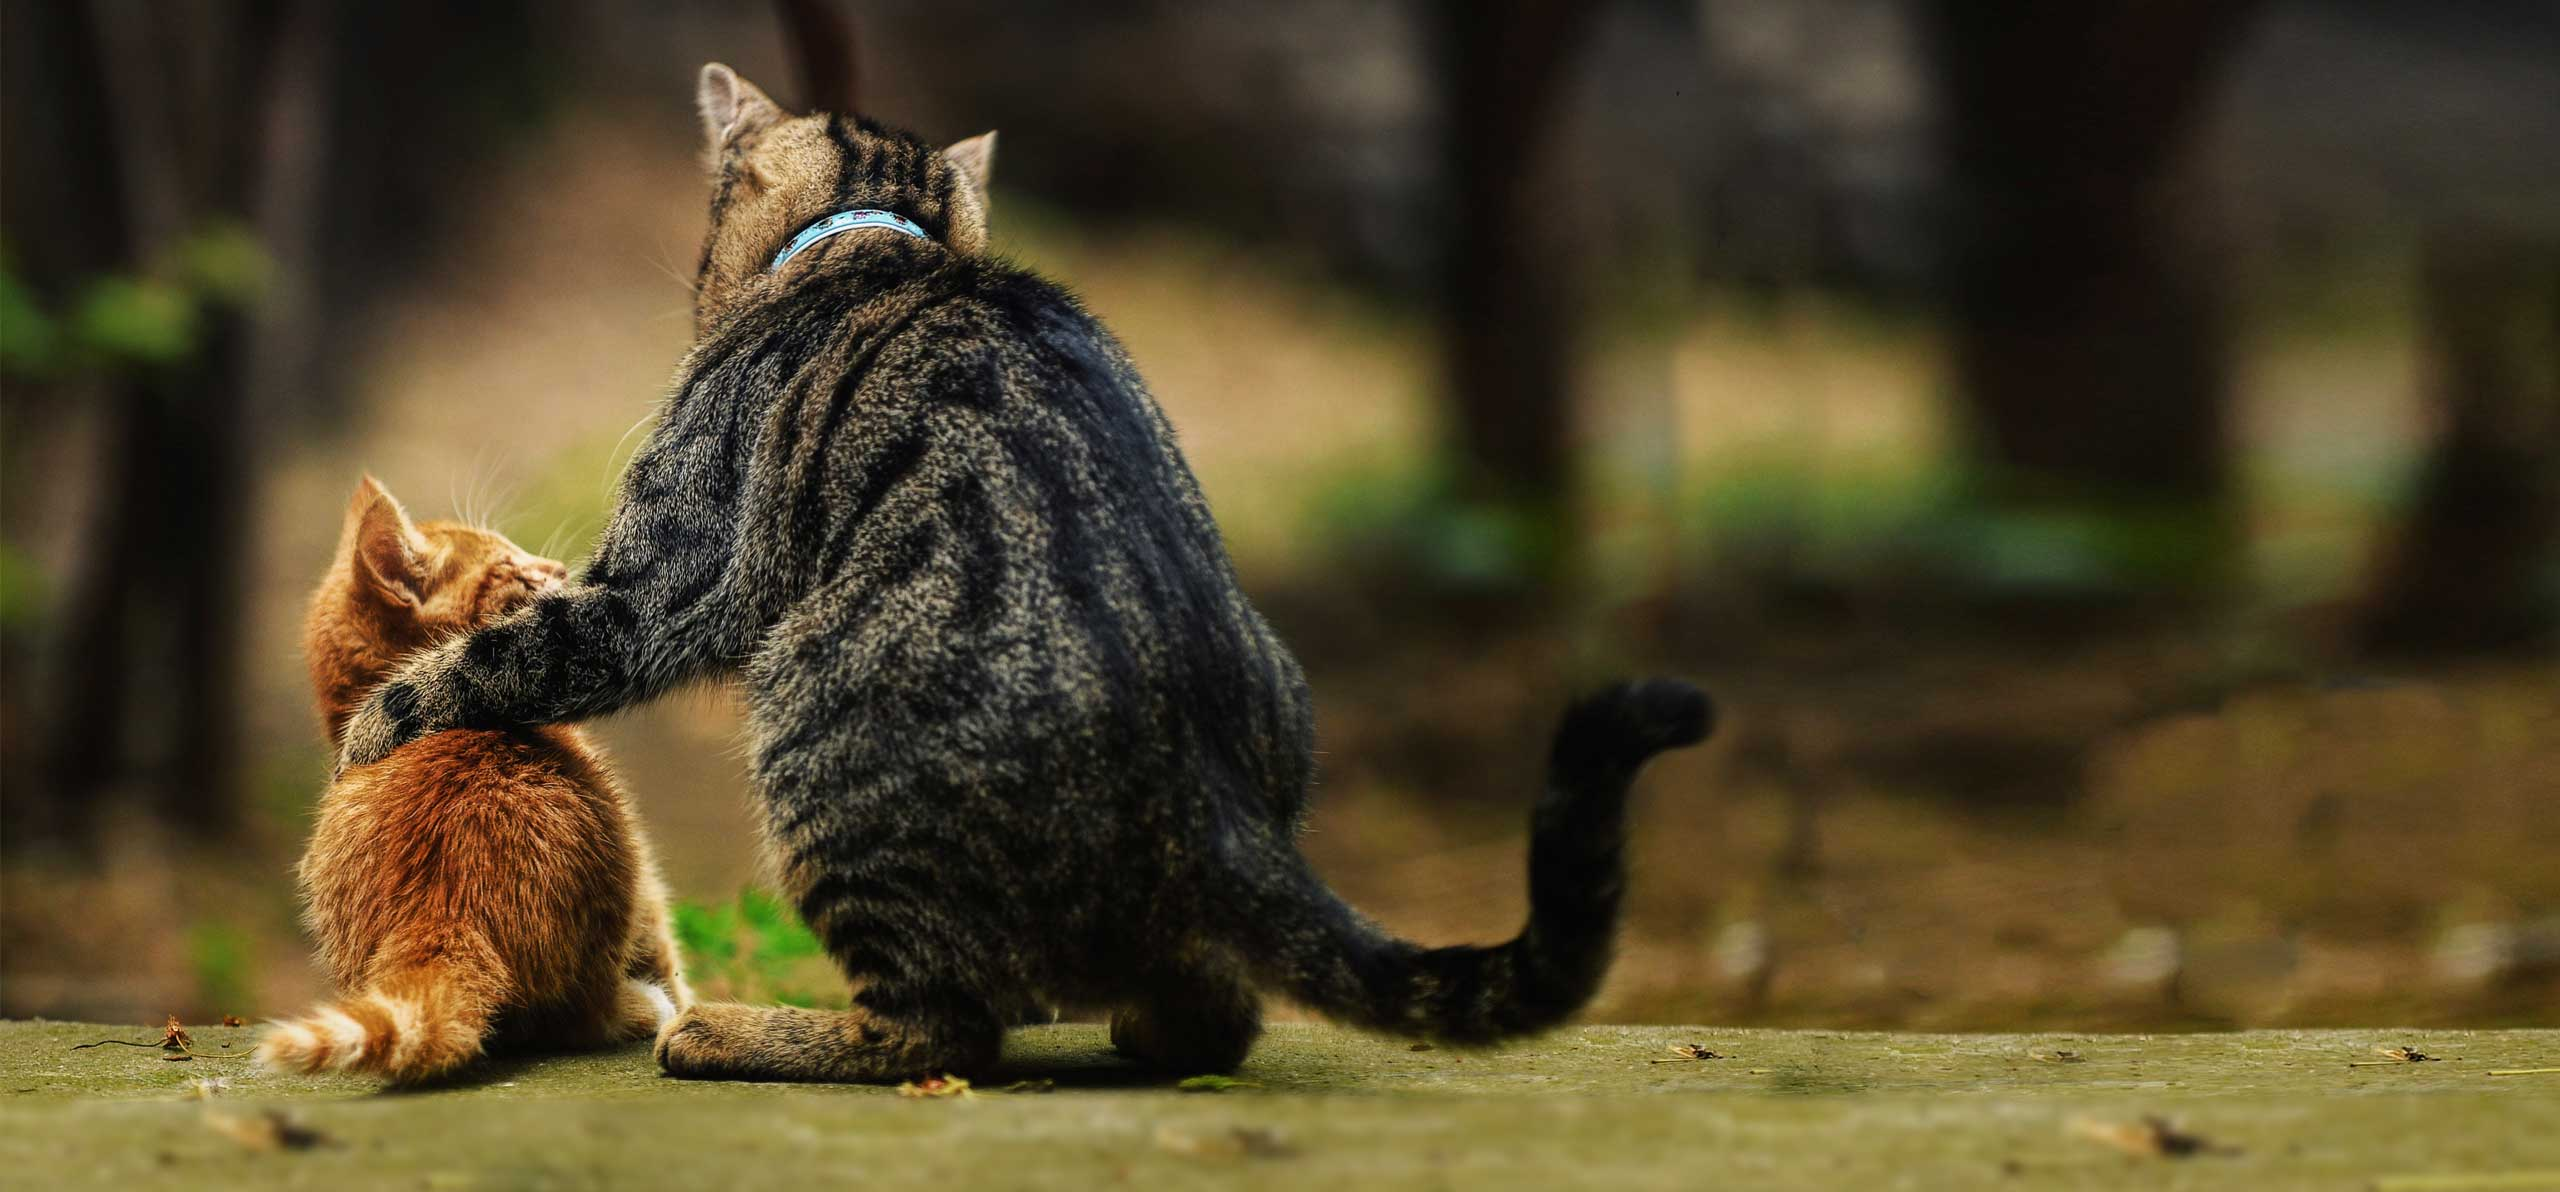

In [10]:
img=cv2.imread("/content/drive/MyDrive/data/cats/01_adding_cat_header.jpg")
cv2_imshow(img)

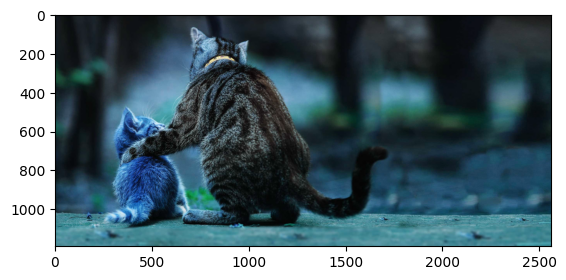

In [11]:
plt.imshow(img)
plt.show()

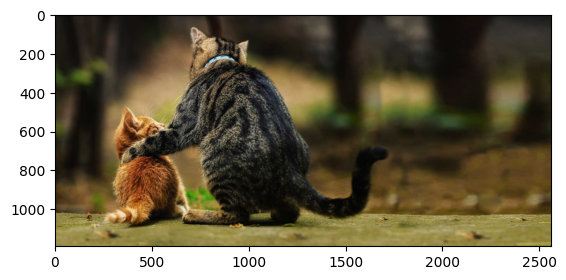

In [12]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [13]:
for image_class in os.listdir(data): 
    for image in os.listdir(os.path.join(data, image_class)):
        image_path = os.path.join(data, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in img_ext: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

In [14]:
tf.data.Dataset

tensorflow.python.data.ops.dataset_ops.DatasetV2

In [15]:
import numpy as np
from matplotlib import pyplot as plt

In [16]:
data=tf.keras.utils.image_dataset_from_directory("/content/drive/MyDrive/training_data",image_size=(228,228))

Found 15600 files belonging to 10 classes.


In [17]:
data_iterator = data.as_numpy_iterator()

In [18]:
batch = data_iterator.next()
batch

(array([[[[107.60649 , 106.60649 , 102.60649 ],
          [109.94483 , 108.94483 , 104.94483 ],
          [107.31094 , 106.31094 , 102.31094 ],
          ...,
          [112.037704, 110.037704, 111.037704],
          [111.084015, 109.084015, 110.084015],
          [110.761925, 108.761925, 109.761925]],
 
         [[113.81441 , 112.81441 , 108.81441 ],
          [113.39058 , 112.39058 , 108.39058 ],
          [110.14127 , 109.14127 , 105.14127 ],
          ...,
          [113.039024, 111.039024, 112.039024],
          [109.77075 , 107.77075 , 108.77075 ],
          [107.307014, 105.307014, 106.307014]],
 
         [[117.22191 , 116.22191 , 112.22191 ],
          [113.76708 , 112.76708 , 108.76708 ],
          [107.41674 , 106.41674 , 102.41674 ],
          ...,
          [114.732544, 112.732544, 113.732544],
          [111.488205, 109.488205, 110.488205],
          [109.620186, 107.620186, 108.620186]],
 
         ...,
 
         [[135.79694 , 138.79694 , 143.79694 ],
          [137.626

In [19]:
len(batch)
# will print the groups in which dataset is classified

2

In [20]:
batch[1]

array([1, 0, 6, 5, 3, 8, 2, 2, 6, 8, 1, 8, 8, 2, 1, 3, 2, 8, 2, 3, 8, 3,
       6, 5, 3, 9, 6, 8, 9, 5, 5, 7], dtype=int32)

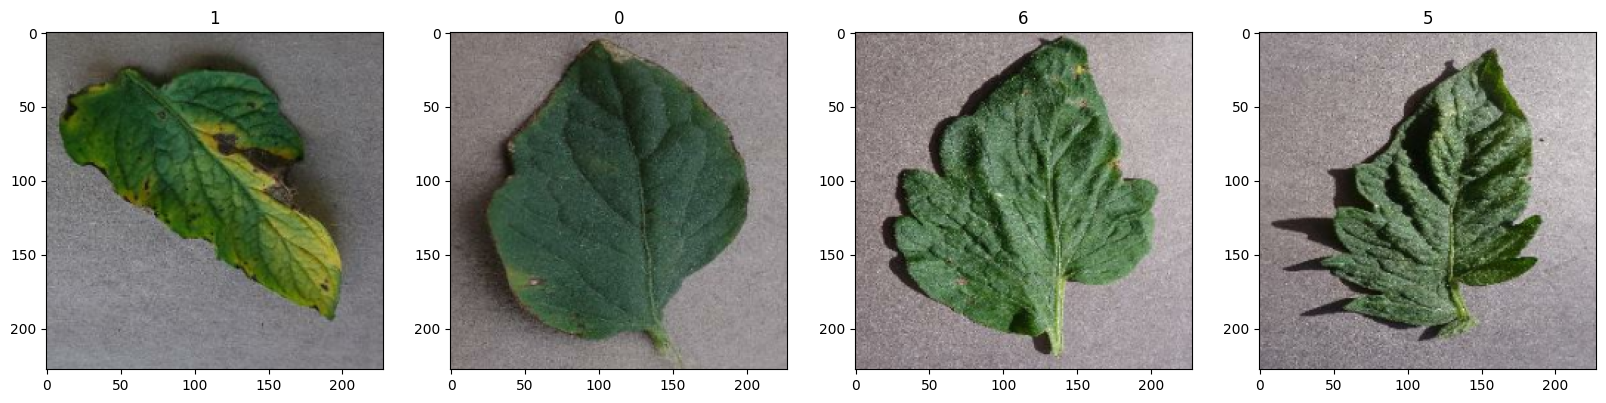

In [21]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [22]:
data = data.map(lambda x,y: (x/255, y))
scaled_iterator=data.as_numpy_iterator()


In [23]:
scaled_iterator1=scaled_iterator.next()
scaled_iterator1


(array([[[[0.75752175, 0.6869335 , 0.6398747 ],
          [0.7487562 , 0.67816794, 0.6311091 ],
          [0.6987094 , 0.6281212 , 0.5810624 ],
          ...,
          [0.6178199 , 0.5472317 , 0.5001729 ],
          [0.5190256 , 0.4484374 , 0.40137854],
          [0.5979428 , 0.5273546 , 0.48029578]],
 
         [[0.7574901 , 0.68690187, 0.63984305],
          [0.79313457, 0.72254634, 0.6754875 ],
          [0.7500616 , 0.67947334, 0.6324145 ],
          ...,
          [0.58089113, 0.5103029 , 0.4632441 ],
          [0.6882525 , 0.6176643 , 0.57060546],
          [0.64915437, 0.57856613, 0.5315073 ]],
 
         [[0.77155197, 0.70096374, 0.6539049 ],
          [0.75218797, 0.68159974, 0.6345409 ],
          [0.73482525, 0.66423696, 0.61717814],
          ...,
          [0.6705999 , 0.60001165, 0.5529528 ],
          [0.73828447, 0.66769624, 0.6206374 ],
          [0.6158163 , 0.54522806, 0.49816927]],
 
         ...,
 
         [[0.609896  , 0.5079352 , 0.4569548 ],
          [0.67097

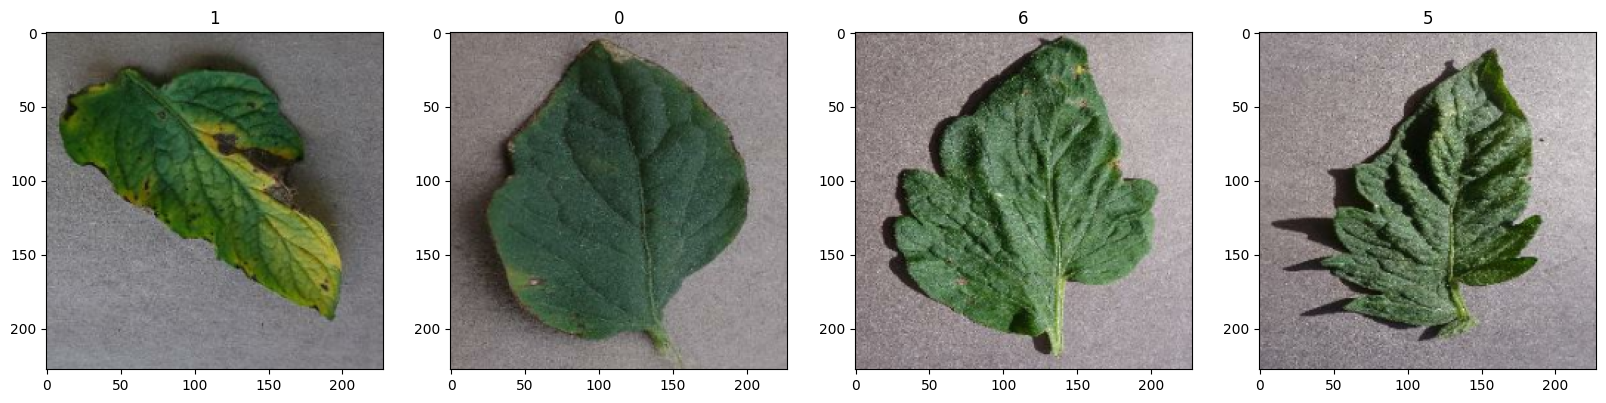

In [24]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [25]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)+2

In [26]:
train_size+val_size+test_size

488

In [27]:
len(data)

488

In [28]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [30]:
model=Sequential()

In [31]:
model.add(Conv2D(32, (3,3), 1, activation='relu', input_shape=(228,228,3)))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [32]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 226, 226, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 113, 113, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 111, 111, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 55, 55, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 53, 53, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 32)       0

In [34]:
hist = model.fit(train, epochs=20, validation_data=val)
# Compile it 


Epoch 1/20
341/341 [==============================] - 69s 162ms/step - loss: -663784849408.0000 - accuracy: 0.1014 - val_loss: -4574518706176.0000 - val_accuracy: 0.1111
Epoch 2/20
341/341 [==============================] - 70s 203ms/step - loss: -65479238483968.0000 - accuracy: 0.1024 - val_loss: -209600561283072.0000 - val_accuracy: 0.1092
Epoch 3/20
341/341 [==============================] - 69s 201ms/step - loss: -746386328911872.0000 - accuracy: 0.1016 - val_loss: -1619838862622720.0000 - val_accuracy: 0.1092
Epoch 4/20
341/341 [==============================] - 69s 201ms/step - loss: -3612478470619136.0000 - accuracy: 0.1024 - val_loss: -6398740524957696.0000 - val_accuracy: 0.1079
Epoch 5/20
341/341 [==============================] - 59s 171ms/step - loss: -11350693398970368.0000 - accuracy: 0.1023 - val_loss: -17688983869849600.0000 - val_accuracy: 0.1108
Epoch 6/20
341/341 [==============================] - 69s 201ms/step - loss: -27644965022597120.0000 - accuracy: 0.1022 - va

In [35]:
hist.history

{'loss': [-663784849408.0,
  -65479238483968.0,
  -746386328911872.0,
  -3612478470619136.0,
  -1.1350693398970368e+16,
  -2.764496502259712e+16,
  -5.669833142593126e+16,
  -1.0385329705975808e+17,
  -1.7421617431209574e+17,
  -2.731760347428946e+17,
  -4.079133163467571e+17,
  -5.857778076787671e+17,
  -8.136858835542344e+17,
  -1.0988920529737482e+18,
  -1.4467760201735864e+18,
  -1.8755843180556452e+18,
  -2.3869388637098476e+18,
  -2.991559758068056e+18,
  -3.6936897416239514e+18,
  -4.5053294340388946e+18],
 'accuracy': [0.10135630518198013,
  0.10236436873674393,
  0.10163123160600662,
  0.10236436873674393,
  0.10227272659540176,
  0.1021810844540596,
  0.10181451588869095,
  0.10236436873674393,
  0.10172287374734879,
  0.10172287374734879,
  0.10236436873674393,
  0.1021810844540596,
  0.10199780017137527,
  0.10163123160600662,
  0.10208944231271744,
  0.10208944231271744,
  0.10163123160600662,
  0.10208944231271744,
  0.10236436873674393,
  0.10190615803003311],
 'val_loss

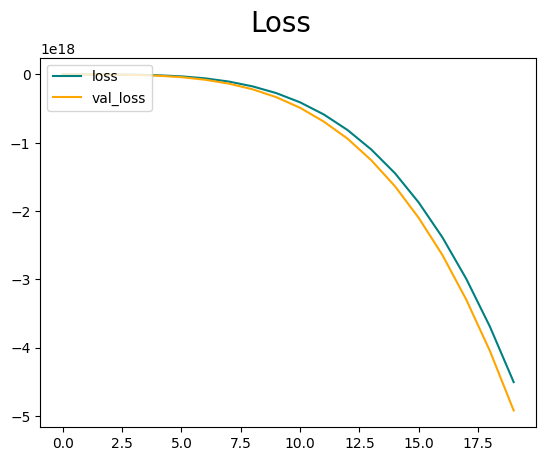

In [36]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()


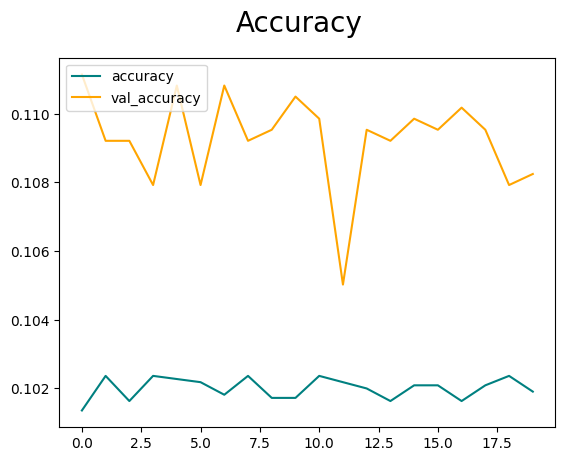

In [37]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [38]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [39]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [40]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 336ms/step


In [41]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.9135101, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(0.109848484, shape=(), dtype=float32)


In [42]:
print(f"Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}")

Precision:0.9135100841522217, Recall:1.0, Accuracy:0.10984848439693451


In [43]:
import cv2


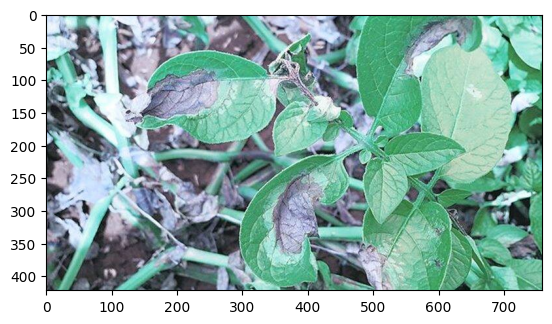

In [45]:
img2 = cv2.imread('/content/dsds.jpg')
plt.imshow(img2)
plt.show()

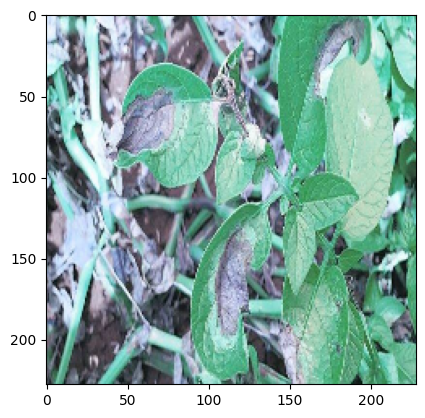

In [46]:
resize = tf.image.resize(img2, (228,228))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [50]:
yhat=model.predict(np.expand_dims(resize/255,0))
yhat

1/1 [==============================] - 0s 18ms/step


array([[1.]], dtype=float32)

In [48]:
resize.shape

TensorShape([228, 228, 3])

In [49]:
np.expand_dims(resize,0).shape

(1, 228, 228, 3)

In [51]:
if yhat > 0.5: 
    print(f'Predicted class is Dog')
else:
    print(f'Predicted class is Cat')

    # the model created before was of differenting between cat and dog which had 
    # an accuarcy of 99% but this is having accuracy of 10-11%

Predicted class is Dog


In [ ]:
from tensorflow.keras.models import load_model


In [ ]:
model.save("tomato_disease_leaf_detection_cnn.h5")
cnn_model.save("tomato_disease_leaf_detection_cnn.h5") # Save model
 
# Load model
tomato_disease_leaf_detection_cnn = keras.models.load_model("tomato_disease_leaf_detection_cnn.h5")
 
Y_pred_sample = tomato_disease_leaf_detection_cnn.predict(np.expand_dims(X_test[0], axis=0)).round(2)
Y_pred_sample
 
np.argmax(Y_pred_sample[0])
 
y_test[0]